# Analisis de datos de un data set de "Credit Card Approval"



integrantes
Javier Briones
Gabriel Gonzalez
Luis Rodriguez

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Comprensión de los datos

Aquí se leerá el dataset.

In [2]:
CC_data = pd.read_csv("default of credit card clients.csv")


Se generará estadísticas descriptivas del dataset.

In [3]:
CC_data.describe()


ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [4]:
#se elimino la variable ID que no tiene importancia
CC_data=CC_data.drop(['ID'], axis = 1)


In [5]:
CC_data.head(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

Se comprueba que los datos no presenten si hay valores nulos y los suma.

In [6]:
CC_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 2. Descripción y distribución de los datos

Se mostrará como están agrupado los datos en cada grupo.Se eligieron ciertas variables para la representacion que prematuramente se supuso que podrian representar mejor este modelo de datos

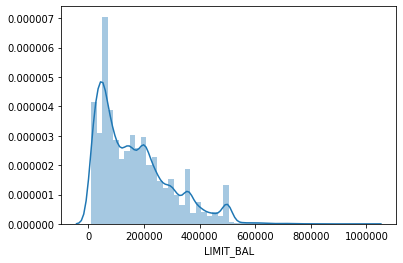

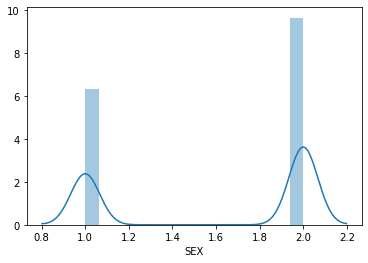

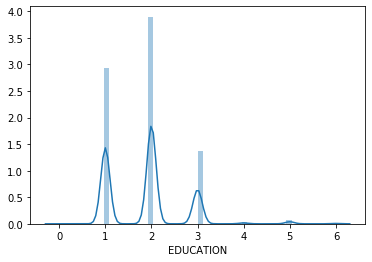

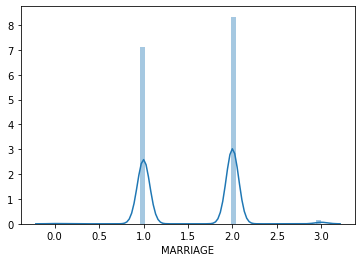

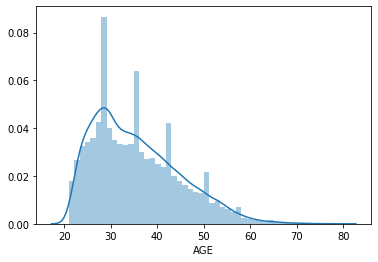

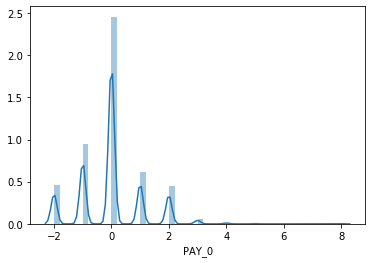

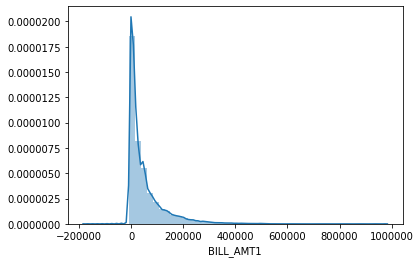

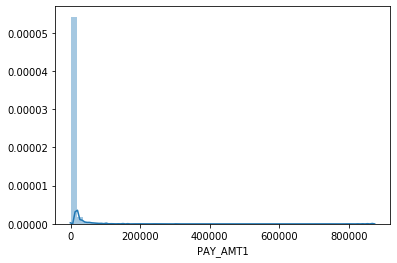

In [7]:
def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['LIMIT_BAL'])       
plotDistPlot(CC_data['SEX'])                           
plotDistPlot(CC_data['EDUCATION'])                    
plotDistPlot(CC_data['MARRIAGE'])                     
plotDistPlot(CC_data['AGE'])                         
plotDistPlot(CC_data['PAY_0'])                        
#plotDistPlot(CC_data['PAY_2'])                    
#plotDistPlot(CC_data['PAY_3'])                   
#plotDistPlot(CC_data['PAY_4'])                
#plotDistPlot(CC_data['PAY_5'])            
#plotDistPlot(CC_data['PAY_6'])         
plotDistPlot(CC_data['BILL_AMT1'])       
#plotDistPlot(CC_data['BILL_AMT2'])    
#plotDistPlot(CC_data['BILL_AMT3'])
#plotDistPlot(CC_data['BILL_AMT4'])
#plotDistPlot(CC_data['BILL_AMT5'])
#plotDistPlot(CC_data['BILL_AMT6'])
plotDistPlot(CC_data['PAY_AMT1'])
#plotDistPlot(CC_data['PAY_AMT2'])
#plotDistPlot(CC_data['PAY_AMT3'])
#plotDistPlot(CC_data['PAY_AMT4'])
#plotDistPlot(CC_data['PAY_AMT5'])
#plotDistPlot(CC_data['default payment next month'])


## Matriz de correlación de las variables(Correlacion de pearson).

Donde los datos que son mas cercano a 1 son directamente proporcional y los mas cercanos a -1 son inversamente proporcional. 

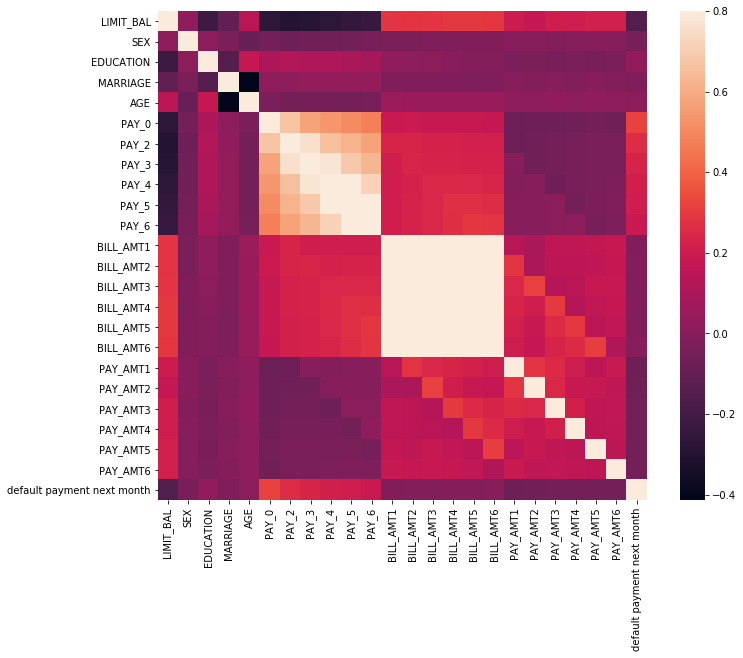

In [8]:

corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Grafica de Dispersion de las variables.
Aqui se muestra la grafica que creimos que eran mas representativas para mostrar los datos 



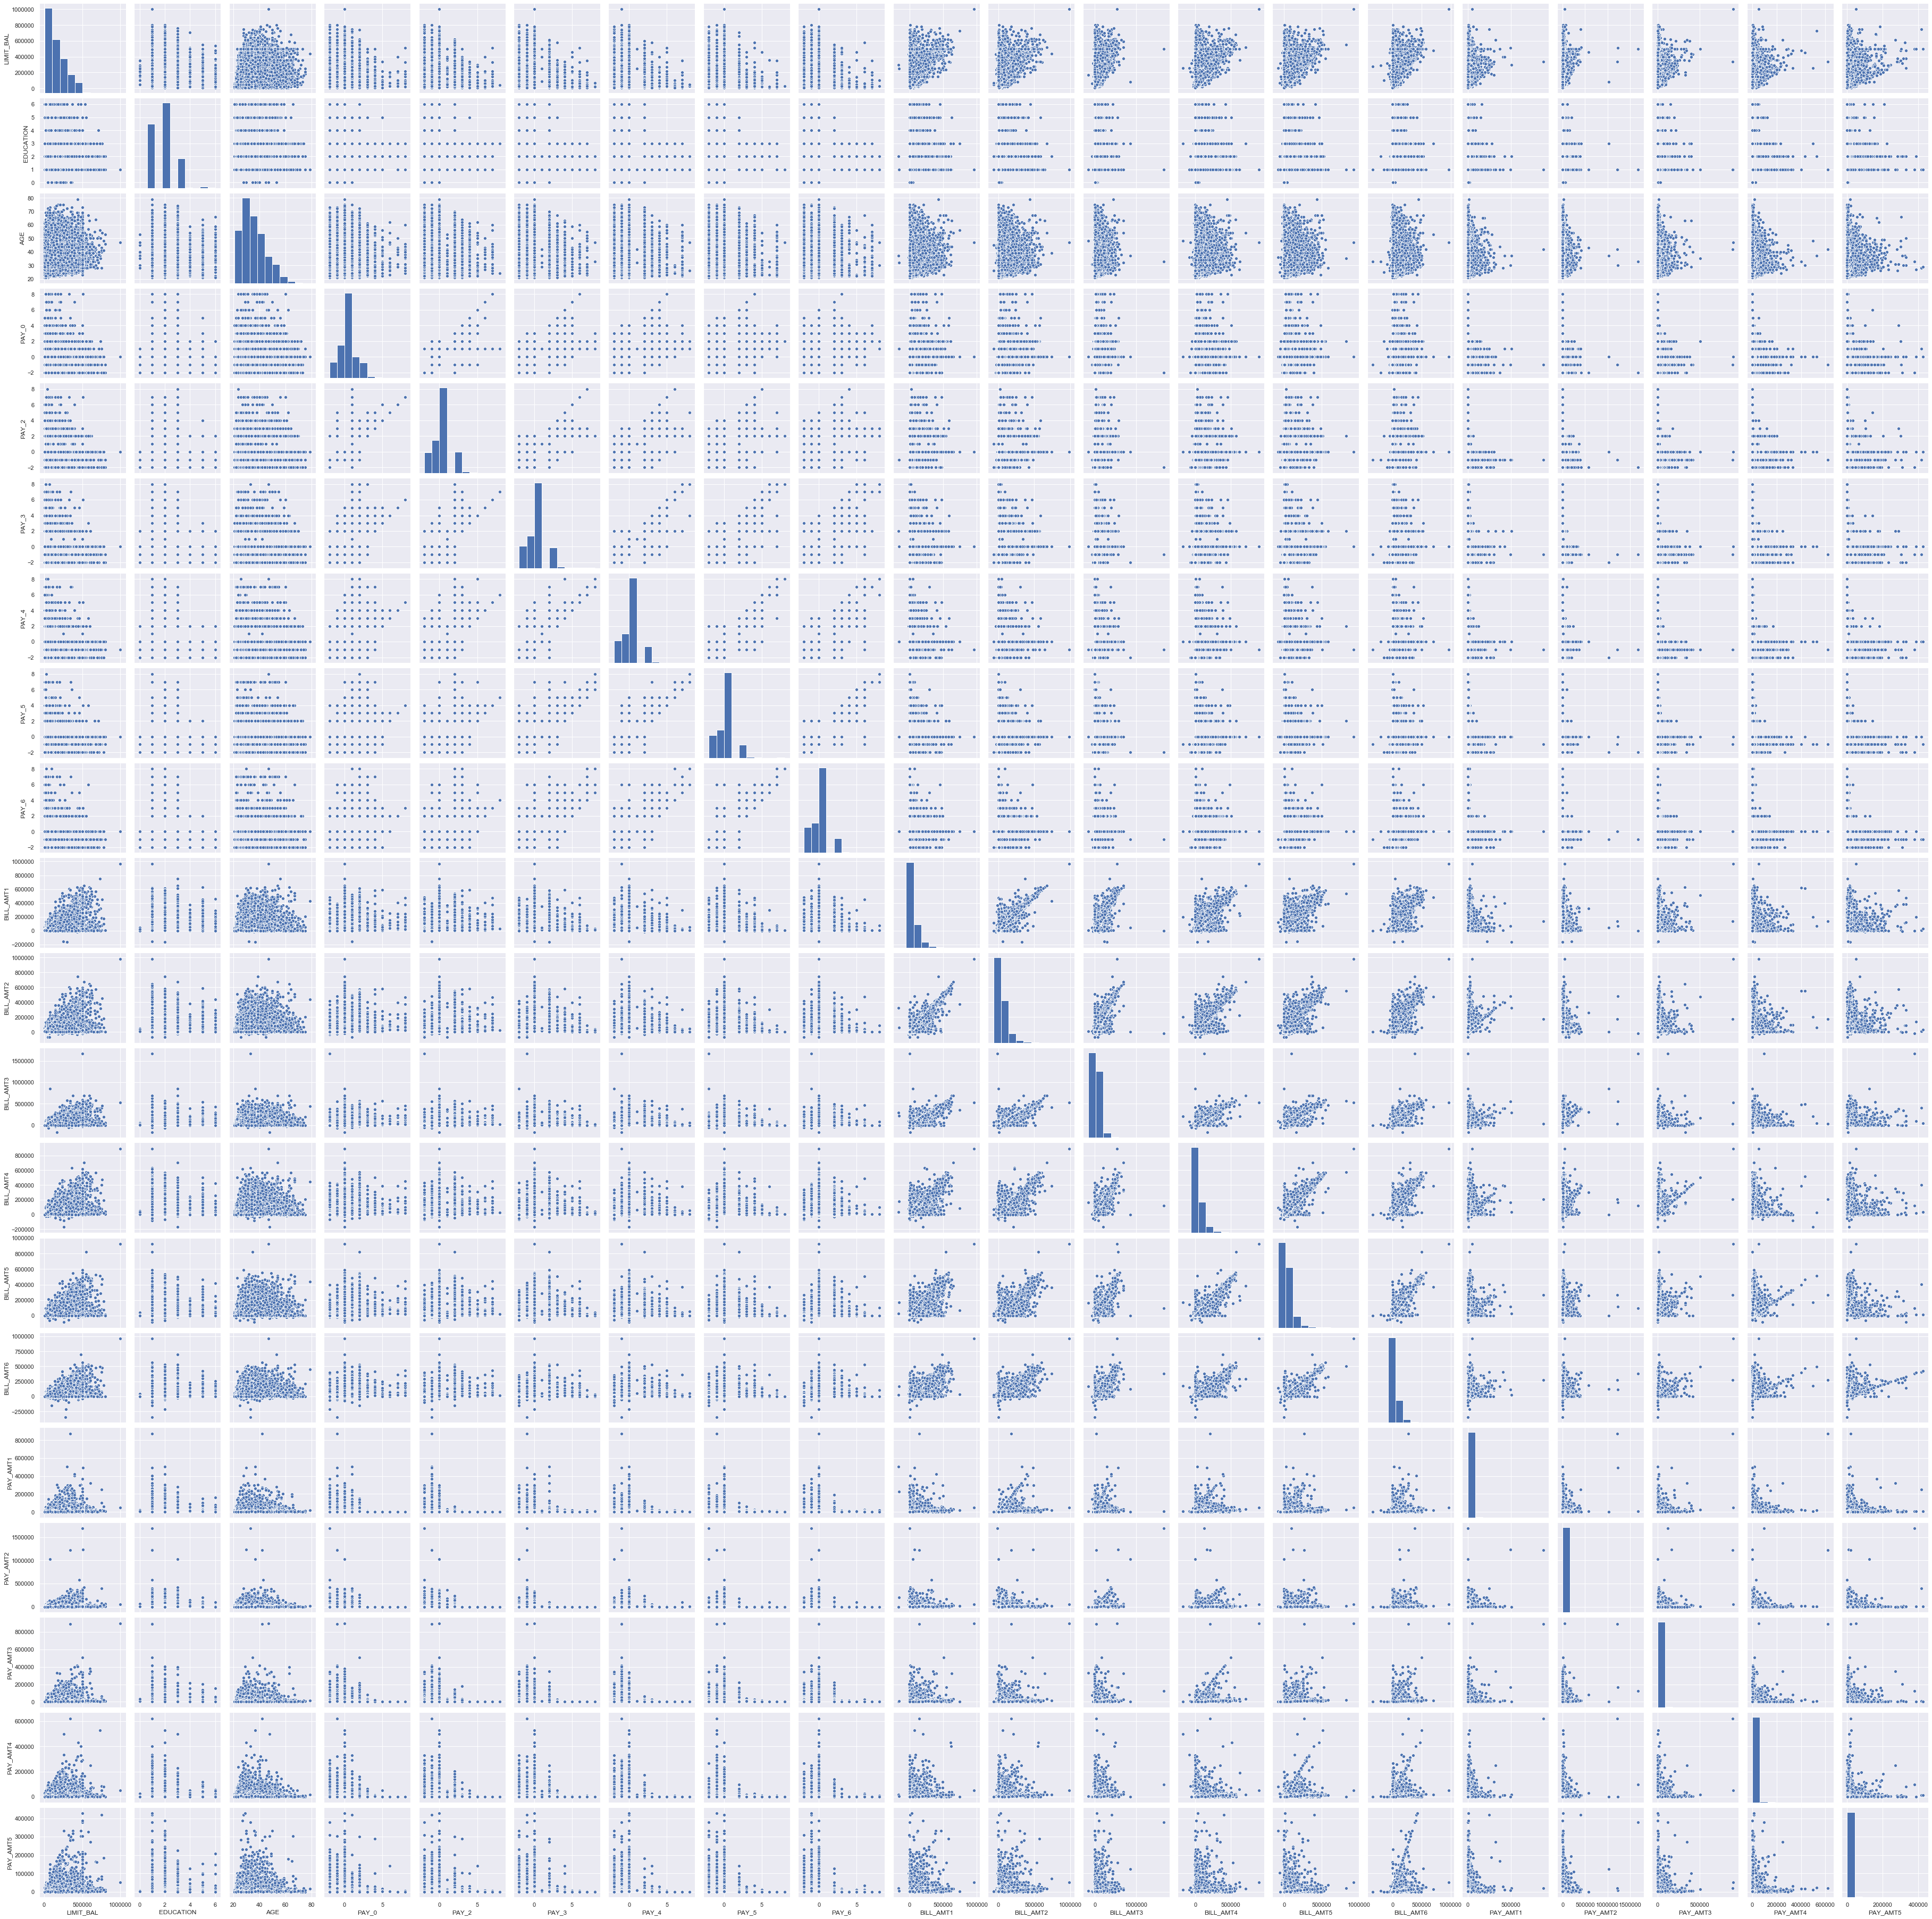

In [9]:
sns.set()
cols = ['LIMIT_BAL',
        #'SEX',
        'EDUCATION',
        #'MARRIAGE',
        'AGE',
        'PAY_0',
        #'PAY_2',
        #'PAY_3',
        #'PAY_4',
        #'PAY_5',          
        #'PAY_6',         
        'BILL_AMT1',       
        #'BILL_AMT2',   
        #'BILL_AMT3',
        #'BILL_AMT4',
        #'BILL_AMT5',
        #'BILL_AMT6',
        'PAY_AMT1',
        #'PAY_AMT2',
        #'PAY_AMT3',
        #'PAY_AMT4',
        #'PAY_AMT5',
        #'PAY_AMT6',
        #'default payment next month'
]
sns.pairplot(CC_data[cols], size = 2.5 )
plt.show();

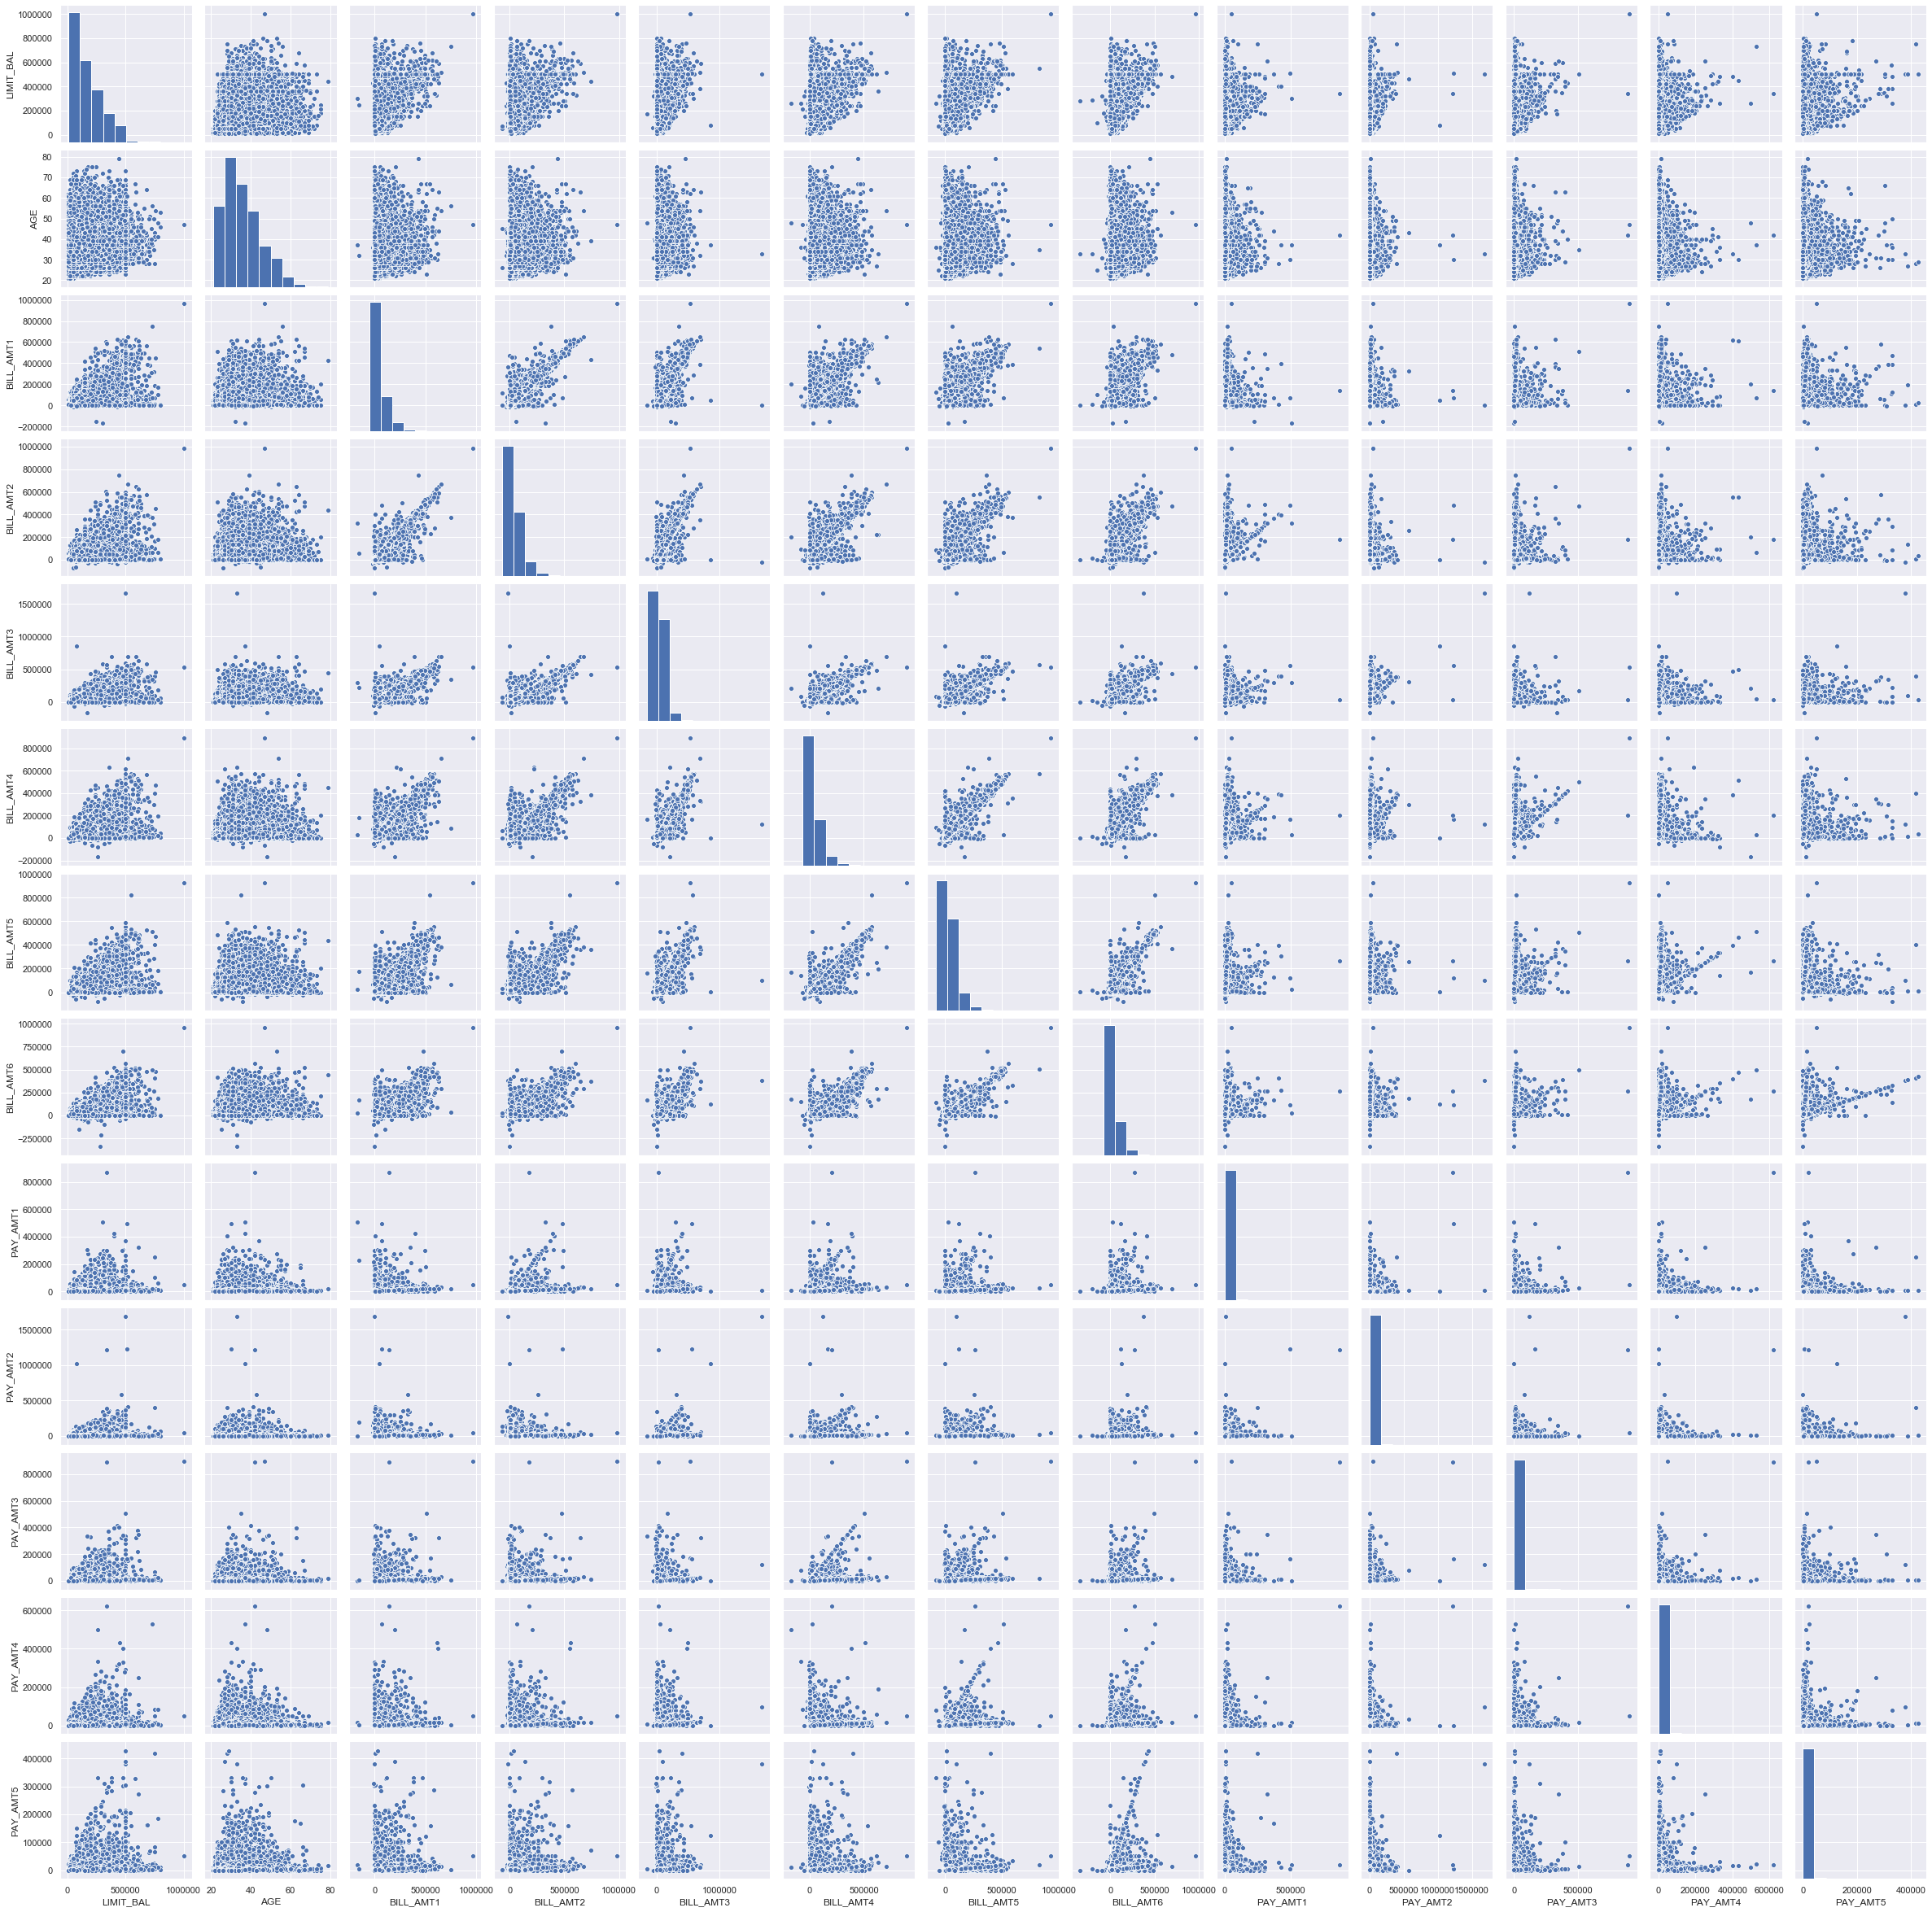

In [10]:
sns.set()
cols = ['LIMIT_BAL',
        'AGE',      
        'BILL_AMT1',       
        'BILL_AMT2',   
        'BILL_AMT3',
        'BILL_AMT4',
        'BILL_AMT5',
        'BILL_AMT6',
        'PAY_AMT1',
        'PAY_AMT2',
        'PAY_AMT3',
        'PAY_AMT4',
        'PAY_AMT5',
]
sns.pairplot(CC_data[cols], size = 2.5 )
plt.show();

Se muestra el recuento de los que pagaron (1) y los que no pagaron (0) .

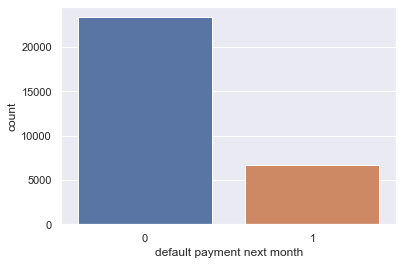

In [11]:
sns.countplot(data = CC_data, x = 'default payment next month')

In [12]:
print("shape of the data:", CC_data.shape)

shape of the data: (30000, 24)


In [13]:
CC_data.tail(15)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
29985     240000    1          1         2   30     -2     -2     -2     -2   
29986     360000    1          1         2   35     -1     -1     -2     -2   
29987     130000    1          1         2   34      0      0      0      0   
29988     250000    1          1         1   34      0      0      0      0   
29989     150000    1          1         2   35     -1     -1     -1     -1   
29990     140000    1          2         1   41      0      0      0      0   
29991     210000    1          2         1   34      3      2      2      2   
29992      10000    1          3         1   43      0      0      0     -2   
29993     100000    1          1         2   38      0     -1     -1      0   
29994      80000    1          2         2   34      2      2      2      2   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29985     -2  ...          0          0          0         0         0   
29986     -2  ...          0          0          0         0         0   
29987      0  ...     108047      93708      97353      3000      2000   
29988      0  ...     245750     175005     179687     65000      8800   
29989     -1  ...        780          0          0      9054         0   
29990      0  ...     138262      49675      46121      6000      7000   
29991      2  ...       2500       2500       2500         0         0   
29992     -2  ...          0          0          0      2000         0   
29993      0  ...      70626      69473      55004      2000    111784   
29994      2  ...      77519      82607      81158      7000      3500   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29985         0         0         0         0                           0  
29986         0         0         0         0                           0  
29987     93000      4000      5027      4005                           0  
29988      9011      6000      7000      6009                           0  
29989       783         0         0         0                           0  
29990      4228      1505      2000      2000                           0  
29991         0         0         0         0                           1  
29992         0         0         0         0                           0  
29993      4000      3000      2000      2000                           0  
29994         0      7000         0      4000                           1  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[15 rows x 24 columns]

In [14]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

## 4. Modelado y evaluación de datos

se le pasan los datos a los datos a X e y

In [19]:
X = CC_data.iloc[:,[0,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
y = CC_data.iloc[:,23].values

In [20]:
print("\n se reviso los datos en X: \n", X ,"\n se comprobo la dimension:\n",X.shape)
print("-"*50)
print("\n se reviso los datos en X: \n", y ,"\n se comprobo la dimension: ",y.shape)


 se reviso los datos en X: 
 [[ 20000      2      1 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      1 ...   1926  52964   1804]
 [ 50000      1      1 ...   1000   1000   1000]] 
 se comprobo la dimension:
 (30000, 21)
--------------------------------------------------

 se reviso los datos en X: 
 [1 1 0 ... 1 1 1] 
 se comprobo la dimension:  (30000,)


# Dividir el data set en conjunto de entrenamiento y en conjunto de testing

In [21]:

# Dividir el data set en conjunto de entrenamiento y en conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)



# Escalado de variables

In [22]:
# Escalado de variables
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# aqui comprobamos los datos

In [23]:
print("X entrenamiento\n",X_train)
print("X testeo\n",X_test)
print("Y entrenamiento\n",y_train)
print("Y testeo\n",y_test)

X entrenamiento
 [[-1.14095868  0.81451348 -1.06119761 ... -0.24739232 -0.3163186
  -0.296449  ]
 [ 0.71261375  0.81451348  0.85735174 ... -0.29047404 -0.30543928
  -0.27980761]
 [-1.14095868 -1.22772676 -1.06119761 ... -0.26676941 -0.21873439
  -0.296449  ]
 ...
 [-0.29140465  0.81451348 -1.06119761 ... -0.04716245 -0.3163186
  -0.0124662 ]
 [-0.90926213  0.81451348 -1.06119761 ... -0.24739232 -0.25038332
  -0.26805072]
 [-0.21417247  0.81451348  0.85735174 ... -0.18280204 -0.17126099
  -0.18285588]]
X testeo
 [[-1.14095868 -1.22772676  0.85735174 ... -0.20863815 -0.3163186
  -0.25987201]
 [-1.14095868  0.81451348  0.85735174 ... -0.3119826  -0.25038332
  -0.296449  ]
 [ 0.48091719  0.81451348 -1.06119761 ... -0.3119826  -0.3163186
  -0.296449  ]
 ...
 [-0.67756558 -1.22772676 -1.06119761 ... -0.21509718 -0.30721953
  -0.293098  ]
 [-1.14095868 -1.22772676  0.85735174 ... -0.3119826  -0.18444804
  -0.296449  ]
 [-0.90926213 -1.22772676  0.85735174 ...  0.02840818 -0.13077673
  -0.1210

se comprobo las dimensiones 

In [24]:
print("X_train:",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train:",y_train.shape)
print("y_test: ",y_test.shape)

X_train: (24000, 21)
X_test:  (6000, 21)
y_train: (24000,)
y_test:  (6000,)


# Ajustar el clasificador en el Conjunto de Entrenamiento

In [25]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Aplicar k-fold cross validation

### kfold =10


In [26]:
# Aplicar k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

## metricas del cross validation

In [27]:
print("10" ,"validaciones con cross validation fueron las siguientes \n",accuracies)

10 validaciones con cross validation fueron las siguientes 
 [0.8125     0.82041667 0.82625    0.82583333 0.81875    0.81208333
 0.81583333 0.81416667 0.81333333 0.8175    ]


In [28]:
print("el promedio fue de: ",accuracies.mean())
print("la desviacion estandar fue de: ",accuracies.std())

el promedio fue de:  0.8176666666666668
la desviacion estandar fue de:  0.004913134324327886


# Random Forest con estimador 5 

In [29]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 5, criterion = "entropy", random_state = 0)
classifier = RandomForestClassifier(n_estimators = 5,  random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
print("El Random Forest Classifier tiene una precisión de: ", classifier.score(X_test, y_test))

El Random Forest Classifier tiene una precisión de:  0.7975


# comparativa con los estimadores

In [31]:
'''#con todos los datos desde el 5 hasta el estimador 50
wcss = []
for i in range(5, 51):
    classifier = RandomForestClassifier(n_estimators = i,  random_state = 0)
    classifier.fit(X_train, y_train)
    wcss.append(classifier.score(X_test, y_test))
'''


'#con todos los datos desde el 5 hasta el estimador 50\nwcss = []\nfor i in range(5, 51):\n    classifier = RandomForestClassifier(n_estimators = i,  random_state = 0)\n    classifier.fit(X_train, y_train)\n    wcss.append(classifier.score(X_test, y_test))\n'

In [32]:
'''#ploteo de todo los datos
plt.plot(range(5,51), wcss)
plt.title("comparativa de los estimadores")
plt.xlabel("Número de Estimador")
plt.ylabel("precision")
plt.show()'''

'#ploteo de todo los datos\nplt.plot(range(5,51), wcss)\nplt.title("comparativa de los estimadores")\nplt.xlabel("Número de Estimador")\nplt.ylabel("precision")\nplt.show()'

In [33]:
# con los datos de 5 en 5 hasta el estimador 50
wcss = []
for i in range(5, 55,5):
    classifier = RandomForestClassifier(n_estimators = i,  random_state = 0)
    classifier.fit(X_train, y_train)
    wcss.append(classifier.score(X_test, y_test))

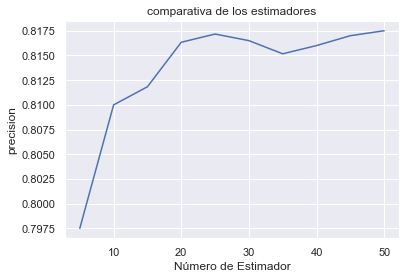

In [34]:
plt.plot(range(5,55,5), wcss)
plt.title("comparativa de los estimadores")
plt.xlabel("Número de Estimador")
plt.ylabel("precision")
plt.show()


In [35]:
print("El Random Forest Classifier\n")

for i in range(len(wcss)):
    print("Estimador:",(i+1)*5,"precision:",wcss[i],)
   # if i == 0:
    #    print("Estimador: 5 ","precision:",wcss[i])
    #else:
    #    print("Estimador:",(i+1)*5,"precision:",wcss[i],)
    

El Random Forest Classifier

Estimador: 5 precision: 0.7975
Estimador: 10 precision: 0.81
Estimador: 15 precision: 0.8118333333333333
Estimador: 20 precision: 0.8163333333333334
Estimador: 25 precision: 0.8171666666666667
Estimador: 30 precision: 0.8165
Estimador: 35 precision: 0.8151666666666667
Estimador: 40 precision: 0.816
Estimador: 45 precision: 0.817
Estimador: 50 precision: 0.8175


# Predicción de los resultados con el Conjunto de Testing

In [36]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


# Elaborar una matriz de confusión

In [37]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[4437  266]
 [ 829  468]]


como podemos ver nuestro modelo predijo el 4875(4443+432) son correctas y los resultados erroneos fueron de 1125(865+260) con la matriz de confusion

In [ ]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print el ranking de los features
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d  (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotea la importancia de los feature en el forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# parte de k-mean

In [ ]:
'''
se crea una copia del la data para el modelo de k-mean por que se ve que ahi que modificar los datos por que kmean no trabaja 
muy bien con los datos categoricos por eso en este data set sacan esos datos que afectan los resultados
'''
data_kmean = CC_data.copy()




In [ ]:
data_kmean=data_kmean.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6'], axis = 1)

In [ ]:
data_kmean.describe()

In [ ]:
X = np.array(data_kmean[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
y = np.array(data_kmean['default payment next month'])
X.shape



In [ ]:
X_train_kmean, X_test_kmean, y_train_kmean, y_test_kmean = train_test_split(X, y,test_size = 0.2, random_state = 0)

# revisar 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0],
           X[:, 1], 
           X[:, 2], 
           X[:, 3], 
#          X[:, 4],
#          X[:, 5],
#          X[:, 6], 
#           X[:, 7],
#           X[:, 8], 
#           X[:, 9], 
#           X[:, 10], 
#           X[:, 11], 
#           X[:, 12], 
#           X[:, 13],
           c=asignar,s = 60)

sc_X = StandardScaler()
X_train_kmean = sc_X.fit_transform(X_train)

X_train_kmean

In [ ]:
from sklearn.cluster import KMeans
Nc = range(1, 31)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train_kmean).score(X_train_kmean) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X_train_kmean)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.predict(X_train_kmean)
# Getting the cluster centers
#C = kmeans.cluster_centers_
C = centroids
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_kmean[:, 0], X_train_kmean[:, 1], X_train_kmean[:, 2],  c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
copy =  pd.DataFrame()
copy['ID']=X_train_kmean['ID'].values
copy['default payment next month']=labels['default payment next month'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

In [ ]:
labels
X_train_kmean


In [ ]:
'''copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo
'''

In [ ]:
'''# Método del codo para averiguar el número óptimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,31), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()'''

In [ ]:
# Aplicar el método de k-means para segmentar el data set
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_kmean)

In [ ]:
#print(y_kmeans.shape)

y_kmeans = kmeans.fit_predict(X_train_kmean)

for elemento in np.nditer(y_kmeans):
    print(elemento)

In [ ]:
# Visualización de los clusters
plt.scatter(X_train_kmean[y_kmeans == 0, 0], X_train_kmean[y_kmeans == 0, 1], s = 100, c = "red", label = "A")
plt.scatter(X_train_kmean[y_kmeans == 1, 0], X_train_kmean[y_kmeans == 1, 1], s = 100, c = "blue", label = "B")
plt.scatter(X_train_kmean[y_kmeans == 2, 0], X_train_kmean[y_kmeans == 2, 1], s = 100, c = "green", label = "C")
plt.scatter(X_train_kmean[y_kmeans == 3, 0], X_train_kmean[y_kmeans == 3, 1], s = 100, c = "cyan", label = "D")
plt.scatter(X_train_kmean[y_kmeans == 4, 0], X_train_kmean[y_kmeans == 4, 1], s = 100, c = "magenta", label = "E")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de pago (1-100)")
plt.legend()

In [ ]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5 ,random_state=0)
for train, test in kf.split(X[0]):
    print("%s %s" % (train, test))